## Muliple Features
- Version of linear regression that look at not just one feature, but a lot of different features.
- In original version of linear regression, we had a signgle feature x, the size of the house and you're able to predict y, the price of the house.
- 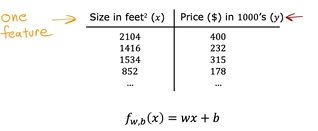
- Consider multiple features 
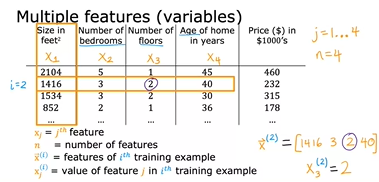
- The model with multiple features will change to 
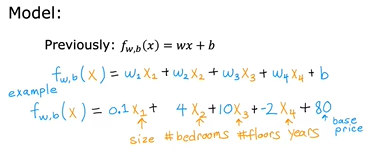
- So here is the definition of the model with n features

- Let's define W as a list of numbers that list the parameters W1, W2, W3, all the way through Wn. In mathematics, this is a vector, which just means a list of numbers. Similarly for X as a list or a vector.
   - So with this notatoon, the model can now be rewritten as dot product
   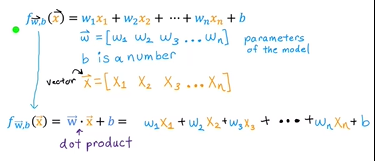
   
- So, The name for this type of linear regression model with multiple input features is multiple linear regression. This is in contrast to univariate regression, which has just one feature.

## Vectorization
- When we're implementing a learning algorithm, using vectorization will both make the code shorter and also make it run much more efficiently
- Here's an example with parameters w and b, where w is a vector with three numbers, and we also have a vector of features x with also 3 numbers
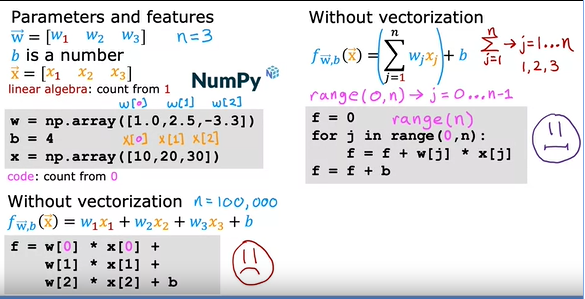
- This doesn't use factorization and isn't effective
- But by using vectorization
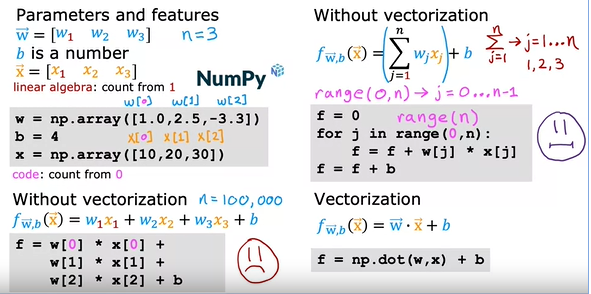
- This NumPy dot product function is a vectorized implementation of the dot product operation b/w 2 vectors and especially when n is large
- Vectorization actually has two distinct benefits
1. It makes code shorter
2. It alos results in the code running much faster than either of the 2 previous implmentations that did not use vectorization

- Let's take a deeper look at how a vectorized implementation may work on the computer behind the scenes
- Without vectorization, it calculates these computations one step ar a time, one step after another.
- But with vectorization, the function in Numpy is implemeted in the computer hardware with vectorization. The computer can get all values of the vectors w and x, and in a single-step, it multiples each pair of w and x with each other all at the same time in parallel.  Then after that, the computer takes these multiplied w and x pairs and uses specifized hardware to add them altogether very effeciciently, rather than needing to carry out distinct additions one after another to add up these wx numbers.
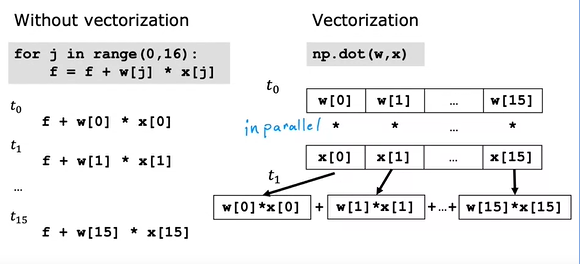
- Let's  take a look at a concrete example of how this helps with implementing multiple linear regression. Say we have 16 features and 16 parameters
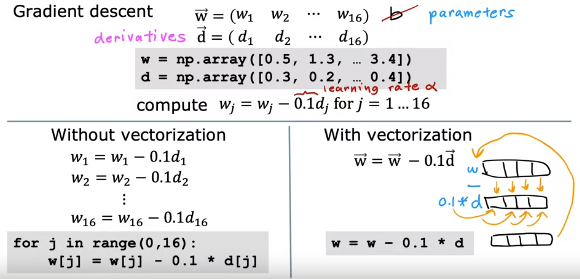

## LAB : Python, NumPy and Vectorization

In [1]:
import numpy as np
import time

### Python and Numpy
- Python is the programmign language which has a set of numeric data types and arithmetic operations.
- Numpy is a livbrary that extends the base capabilities of python to add a richer data set including more numeric types, vectors, matrices, and many matrix functions.
- Numpy and python work together fairly seamlessaly.
- Python arithemetic operators work on NumPy data types and many NumPy functions will accept python data types

### Vectors
#### Abstract
- Vectora are ordered arrays of numbers.
- In notation, vectors are denoted with lower case bold letters such as x. 
- The elements of a vector are all the same type. A vector does not contain both characters and numbers. 
- The number of elements in the array is often referred to as the dimension though mathematicians may prefer rank.
- The elements of a vector can be referenced with an index.

### NumPy Arrays
- NumPy's basic data structure is an indexable, n-dimensional array containing elements of the same type (dtype). 

### Vector Creation


In [8]:
# NumPy routines which allocate memory and fille arrays with value
a = np.zeros(4);
print(f"np.zeros(4) :   a = {a}, a shape = {a.shape}, a data type = {a.dtype}")
a = np.zeros((4, ));
print(f"np.zeros(4,) :  a = {a}, a shape = {a.shape}, a data type = {a.dtype}")
a = np.random.random_sample(4)
print(f"np.random.random_sample(4): a = {a}, a shape = {a.shape}, a data type = {a.dtype}")

np.zeros(4) :   a = [0. 0. 0. 0.], a shape = (4,), a data type = float64
np.zeros(4,) :  a = [0. 0. 0. 0.], a shape = (4,), a data type = float64
np.random.random_sample(4): a = [0.87837414 0.57319329 0.98329951 0.26542329], a shape = (4,), a data type = float64


In [13]:
# Numpy routines which allocate memory and fill arrays with value but do not accept shape as input argument
a = np.arange(4.)
print(f"np.arange(4.): a = {a}, a shape = {a.shape}, a data type = {a.dtype}")
a = np.random.rand(4);
print(f"np.random.rand(4): a = {a}, a shape = {a.shape}, a data type = {a.dtype} ")

np.arange(4.): a = [0. 1. 2. 3.], a shape = (4,), a data type = float64
np.random.rand(4): a = [0.09489258 0.89875014 0.95600179 0.26678621], a shape = (4,), a data type = float64 


In [16]:
# Numpy routines which allocate memory and fill with user specific values
a = np.array([5, 4, 3, 2])
print(f"np.array([5, 4, 3, 2]): a = {a}, a shape = {a.shape}, a data type = {a.dtype} ")
a = np.array([5.,4,3,2])
print(f"np.array([5., 4, 3, 2]): a = {a}, a shape = {a.shape}, a data type = {a.dtype} ")

np.array([5, 4, 3, 2]): a = [5 4 3 2], a shape = (4,), a data type = int32 
np.array([5., 4, 3, 2]): a = [5. 4. 3. 2.], a shape = (4,), a data type = float64 


### Operations on vectors
#### Indexing
- Elements of vectors can be accessed via indexing and slicing.
- NumPy provided a very complete set of indexing and slicing capabilites. 
- Indexing means referring to an element of an array by its position within the array
- Slicing means getting a subset of elements from an array based on their indices
- NumPy starts indexing at zero so the 3rd element of an vector is a[2]

In [17]:
# vector indexing operations on 1-D vectors
a = np.arange(10)
print(a)

# access an element
print(f"a[2].shape : {a[2].shape} a[2] = {a[2]}, Accessing an element returns a scalar")

# Access the last element, negative indexes count from the end
print(f"a[-1] = {a[-1]}")

# Indexes must be within the range of the vector or they will produce and error

try:
    c = a[10]
except Exception as e:
    print("The error message you'll see is :")
    print(e)

[0 1 2 3 4 5 6 7 8 9]
a[2].shape : () a[2] = 2, Accessing an element returns a scalar
a[-1] = 9
The error message you'll see is :
index 10 is out of bounds for axis 0 with size 10


#### Slicing
- slicing creates an array of indices using a set of three values (start:stop:step).
- A subset of values is also valid.

In [18]:
# vector slicing operations
a = np.arange(10)
print(f"a = {a}")

# access 5 consecutive elements (start:stop:step)
c = a[2:7:1]
print("a[2:7:2] = ", c)

# access 3 elements separated by two 
c = a[2:7:2];     print("a[2:7:2] = ", c)

# access all elements index 3 and above
c = a[3:];        print("a[3:]    = ", c)

# access all elements below index 3
c = a[:3];        print("a[:3]    = ", c)

# access all elements
c = a[:];         print("a[:]     = ", c)

a = [0 1 2 3 4 5 6 7 8 9]
a[2:7:2] =  [2 3 4 5 6]
a[2:7:2] =  [2 4 6]
a[3:]    =  [3 4 5 6 7 8 9]
a[:3]    =  [0 1 2]
a[:]     =  [0 1 2 3 4 5 6 7 8 9]


#### Single vector operations

In [20]:
a = np.array([1, 2, 3, 4])
print(f"a : {a}")
# negate elements of a
b = -a
print(f"b = -a : {b}")

# sum all elements of a, returns a scalar
b = np.sum(a)
print(f"b = np.sum(a) : {b}")

b = np.mean(a)
print(f"b = np.mean(a) : {b}")
b = a**2
print(f"b = a**2 : {b}")

a : [1 2 3 4]
b = -a : [-1 -2 -3 -4]
b = np.sum(a) : 10
b = np.mean(a) : 2.5
b = a**2 : [ 1  4  9 16]


#### Vector Vector element-wise operations
- Most of the NumPy arithemetic, logical and comparison operations apply to vectors. These operators work on an element-by-element basis.

In [21]:
a = np.array([1, 2, 3, 4])
b = np.array([-1, -2, 3, 4])
print(f"Binary operators work element wise : {a+b}")

Binary operators work element wise : [0 0 6 8]


In [22]:
# try a mismatched vector operation
c = np.array([1, 2])
try:
    d = a + c
except Exception as e:
    print("The error message is : ", e)

The error message is :  operands could not be broadcast together with shapes (4,) (2,) 


#### Scalar Vector operations
- Vectors can be scaled by scalar values.
- A scalar value is just a number
- the scalar multiplies all the elements of the vector

In [23]:
a = np.array([1, 2, 3, 4])

# Multiply a by a scalar
b = 5*a
print(f"b = 5*a {b}")

b = 5*a [ 5 10 15 20]


### Vector Vector dot product
- The dot product is a mainstay of linear algebra and NumPy. 
- 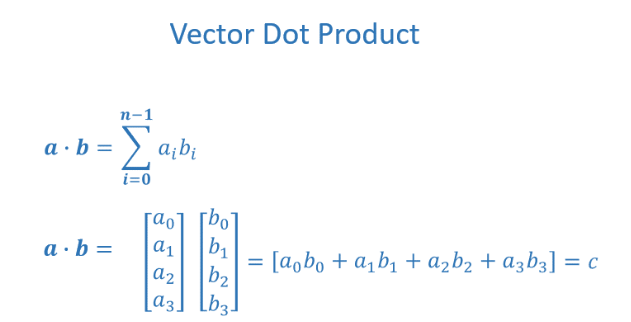
- Vector dot product requires the dimensions of the 2 vectors to be the same.

In [26]:
def my_dot(a, b):
    '''
    Compute the dot product of two vectors
 
    Args:
      a (ndarray (n,)):  input vector 
      b (ndarray (n,)):  input vector with same dimension as a
    
    Returns:
      x (scalar): 
    '''
    
    x = 0
    for i in range(a.shape[0]):
        x = x + a[i]*b[i]
    return x

In [27]:
# test 1-D
a = np.array([1, 2, 3, 4])
b = np.array([-1, 4, 3, 2])
print(f"my_dot(a,b) = {my_dot(a,b)}")

my_dot(a,b) = 24


In [28]:
# test 1-D
a = np.array([1, 2, 3, 4])
b = np.array([-1, 4, 3, 2])
c = np.dot(a, b)
print(f"NumPy 1-D np.dot(a, b) = {c}, np.dot(a, b).shape = {c.shape} ") 
c = np.dot(b, a)
print(f"NumPy 1-D np.dot(b, a) = {c}, np.dot(a, b).shape = {c.shape} ")

NumPy 1-D np.dot(a, b) = 24, np.dot(a, b).shape = () 
NumPy 1-D np.dot(b, a) = 24, np.dot(a, b).shape = () 


- Vectorization provides a large speed. This is because NumPy makes better use of available data parallelism in the underlying hardware. 

In [32]:
# show common Course 1 example
X = np.array([[1],[2],[3],[4]])
w = np.array([2])
c = np.dot(X[1], w)
print(X, c)
print(f"X[1] has shape {X[1].shape}")
print(f"w has shape {w.shape}")
print(f"c has shape {c.shape}")

[[1]
 [2]
 [3]
 [4]] 4
X[1] has shape (1,)
w has shape (1,)
c has shape ()


## Matrices
### Abstract
- Matrices are 2-D arrays.
- The elements of a matrix are all of the same type.
- Donated by bold letter as X.
- The elements of a matrix can be referenced with a 2-D index.
- 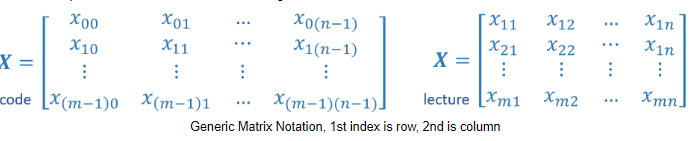

In [33]:
a = np.zeros((1, 5))                                       
print(f"a shape = {a.shape}, a = {a}")                     

a = np.zeros((2, 1))                                                                   
print(f"a shape = {a.shape}, a = {a}") 

a = np.random.random_sample((1, 1))  
print(f"a shape = {a.shape}, a = {a}") 

a shape = (1, 5), a = [[0. 0. 0. 0. 0.]]
a shape = (2, 1), a = [[0.]
 [0.]]
a shape = (1, 1), a = [[0.8217533]]


In [34]:
# NumPy routines which allocate memory and fill with user specified values
a = np.array([[5], [4], [3]]);   print(f" a shape = {a.shape}, np.array: a = {a}")
a = np.array([[5],   # One can also
              [4],   # separate values
              [3]]); #into separate rows
print(f" a shape = {a.shape}, np.array: a = {a}")

 a shape = (3, 1), np.array: a = [[5]
 [4]
 [3]]
 a shape = (3, 1), np.array: a = [[5]
 [4]
 [3]]


#### Indexing
- Matrices include a seconf index. The two indexes describe [row, column]. Access can either return an element or a row/column.

In [38]:
#vector indexing operations on matrices
a = np.arange(6).reshape(3, 2)   #reshape is a convenient way to create matrices
print(f"a.shape: {a.shape}, \na= {a}")

#access an element
print(f"\na[2,0].shape:   {a[2, 0].shape}, a[2,0] = {a[2, 0]},     type(a[2,0]) = {type(a[2, 0])} Accessing an element returns a scalar\n")

#access a row
print(f"a[2].shape:   {a[2].shape}, a[2]   = {a[2]}, type(a[2])   = {type(a[2])}")

a.shape: (3, 2), 
a= [[0 1]
 [2 3]
 [4 5]]

a[2,0].shape:   (), a[2,0] = 4,     type(a[2,0]) = <class 'numpy.int32'> Accessing an element returns a scalar

a[2].shape:   (2,), a[2]   = [4 5], type(a[2])   = <class 'numpy.ndarray'>


#### Slicing

In [39]:
#vector 2-D slicing operations
a = np.arange(20).reshape(-1, 10)
print(f"a = \n{a}")

#access 5 consecutive elements (start:stop:step)
print("a[0, 2:7:1] = ", a[0, 2:7:1], ",  a[0, 2:7:1].shape =", a[0, 2:7:1].shape, "a 1-D array")

#access 5 consecutive elements (start:stop:step) in two rows
print("a[:, 2:7:1] = \n", a[:, 2:7:1], ",  a[:, 2:7:1].shape =", a[:, 2:7:1].shape, "a 2-D array")

# access all elements
print("a[:,:] = \n", a[:,:], ",  a[:,:].shape =", a[:,:].shape)

# access all elements in one row (very common usage)
print("a[1,:] = ", a[1,:], ",  a[1,:].shape =", a[1,:].shape, "a 1-D array")
# same as
print("a[1]   = ", a[1],   ",  a[1].shape   =", a[1].shape, "a 1-D array")

a = 
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]]
a[0, 2:7:1] =  [2 3 4 5 6] ,  a[0, 2:7:1].shape = (5,) a 1-D array
a[:, 2:7:1] = 
 [[ 2  3  4  5  6]
 [12 13 14 15 16]] ,  a[:, 2:7:1].shape = (2, 5) a 2-D array
a[:,:] = 
 [[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]] ,  a[:,:].shape = (2, 10)
a[1,:] =  [10 11 12 13 14 15 16 17 18 19] ,  a[1,:].shape = (10,) a 1-D array
a[1]   =  [10 11 12 13 14 15 16 17 18 19] ,  a[1].shape   = (10,) a 1-D array


## Gradient Descent for Multiple Linear Regression
- 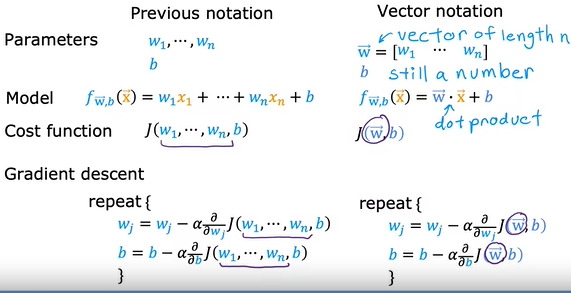
- 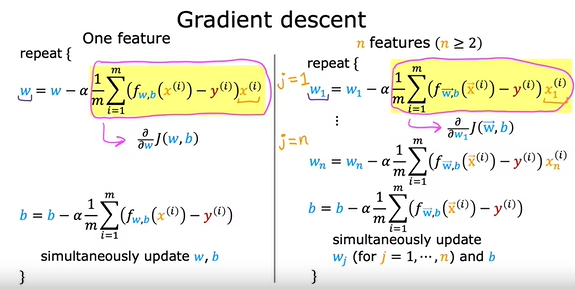

### An alternative to gradient descent
- An alternative way for finding w and b for linear regression. This method is called the normal equation.
- Whereas it turns out gradient descent is a great method for miimizing the cost function J to find w and b, there is one other algorithm that works only for linear regression and this method does not need an iterative gradient descent algorithm, called the normal equation method.
- It uses an advanced linear algebra library to just solve for w andd b all in one goal without iterations.
- Advantages : 
    - Doesn't generalize to other learning algorithms
    - slow when number of features is large (>1000)
- Normal equation method may be used in machine learning libraries that implement linear regression.
- Gradient descent is the recommended method for finding parameters w, b.


## LAB : Multiple Linear Regression

In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

The training dataset contains three examples with four features (size, bedrooms, floors and, age) shown in the table below.  Note that, unlike the earlier labs, size is in sqft rather than 1000 sqft. This causes an issue, which you will solve in the next lab!

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

You will build a linear regression model using these values so you can then predict the price for other houses. 

In [2]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [3]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (3, 4), X Type:<class 'numpy.ndarray'>)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,), y Type:<class 'numpy.ndarray'>)
[460 232 178]


### Parameter vector w, b
* $\mathbf{w}$ is a vector with $n$ elements.
  - Each element contains the parameter associated with one feature.
  - in our dataset, n is 4.
  - notionally, we draw this as a column vector

$$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$
* $b$ is a scalar parameter. 

In [4]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


### Model prediction with mulitple variables
- The model's prediction with multiple variables is given by the linear model
    
- In vector notation
     

In [15]:
def predict_single_loop(x, w, b): 
    """
    single predict using linear regression
    
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters    
      b (scalar):  model parameter     
      
    Returns:
      p (scalar):  prediction
    """
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]  
        p = p + p_i         
    p = p + b                
    return p

In [16]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


### Single Prediction vector

In [17]:
def predict(x, w, b):
    '''
    Single predict using linear regression
    Args:
    x (ndarray) : Shape (n,) example with multiple features
    w (ndarray) : Shape (n,) model parameters
    b (scalar) :             model parameter
    
    Returns:
    p (scalar) : predict
    '''
    p = np.dot(x, w) + b
    return p

In [18]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


### Compute Cost with Multiple Variables
- The equation for the cost function with mutliple variables J(w, b) is
    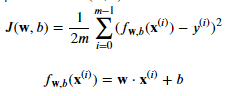

In [21]:
def compute_cost(X, y, w, b):
    '''
    Compute cost
    Args
    X (ndarray (m,n)) : Data, m examples with n features
    y (ndarray (m,)) : Target values
    w (ndarray (n, )) : Model paramaters
    b (scalar) : Model parameters
    
    Returns
    cost (scalar) : cost
    '''
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b  # (n, )(n, ) = scalar 
        cost = cost + (f_wb_i - y[i])**2 # scalar
    cost = cost / (2*m)
    return cost

In [23]:
# Compute and display cost using our pre-choosen optimal parameters
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f"cost at optimal w : {cost}")

cost at optimal w : 1.5578904428966628e-12


### Gradient Descent with Multiple Variables
- Gradient descent for mutliple variables
    - 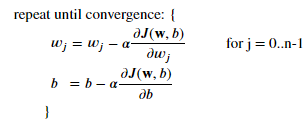
- Where, n is the number of features, parameters wj, b  are updated simultaneosuly
    - 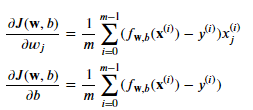
- m is the number of training examples in the data set

In [28]:
def compute_gradient(X, y, w, b):
    '''
    Compute the gradient for linear regression
    Args : 
    X (ndarray (m, n)) : Data, m examples with n features
    y (ndarray (m,)) : target values
    w (ndarray (n, )) : model parameters
    b (scalar) : model parameters
    
    Returns:
    dj_dw (ndarray (n, )) : The graident of the cost w.r.t the parmeters w
    dj_db (scalar): The gradient of the cost w.r.t the parameters b
    '''
    
    m, n = X.shape
    dj_dw = np.zeros((n, ))
    dj_db = 0
    
    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_db, dj_dw

In [29]:
# Computer and display gradient
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1.6739251501955248e-06
dj_dw at initial w,b: 
 [-2.72623577e-03 -6.27197263e-06 -2.21745578e-06 -6.92403391e-05]


### Gradient Descent with Mutliple variables

In [37]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [38]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  2529.46   
Iteration  100: Cost   695.99   
Iteration  200: Cost   694.92   
Iteration  300: Cost   693.86   
Iteration  400: Cost   692.81   
Iteration  500: Cost   691.77   
Iteration  600: Cost   690.73   
Iteration  700: Cost   689.71   
Iteration  800: Cost   688.70   
Iteration  900: Cost   687.69   
b,w found by gradient descent: -0.00,[ 0.20396569  0.00374919 -0.0112487  -0.0658614 ] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


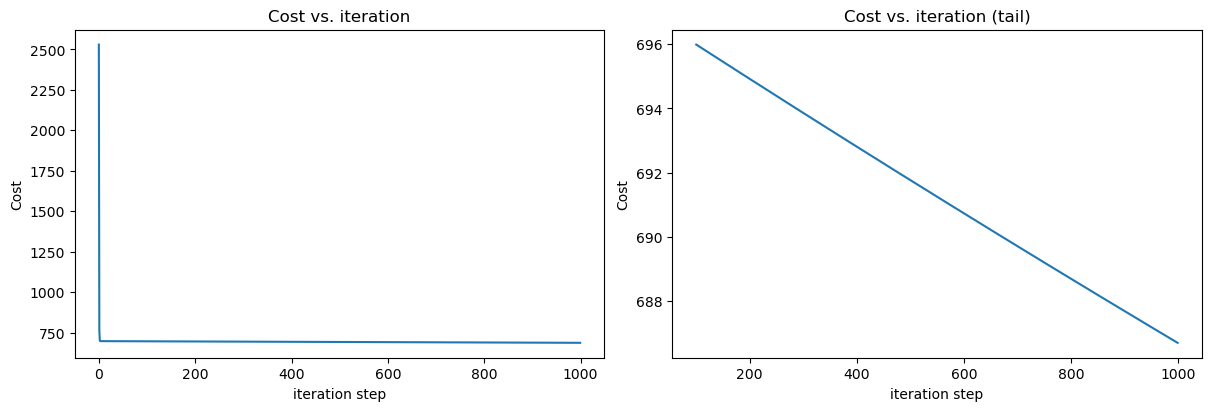

In [39]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()